In [23]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in chosen dataframes
df = pd.read_csv("car_prices.csv")

df = df.rename_axis('Index')

In [24]:
# drop empty entries
df = df.dropna(subset=["make"])

In [25]:
# drop empty entries
df = df.dropna(subset=["sellingprice"])

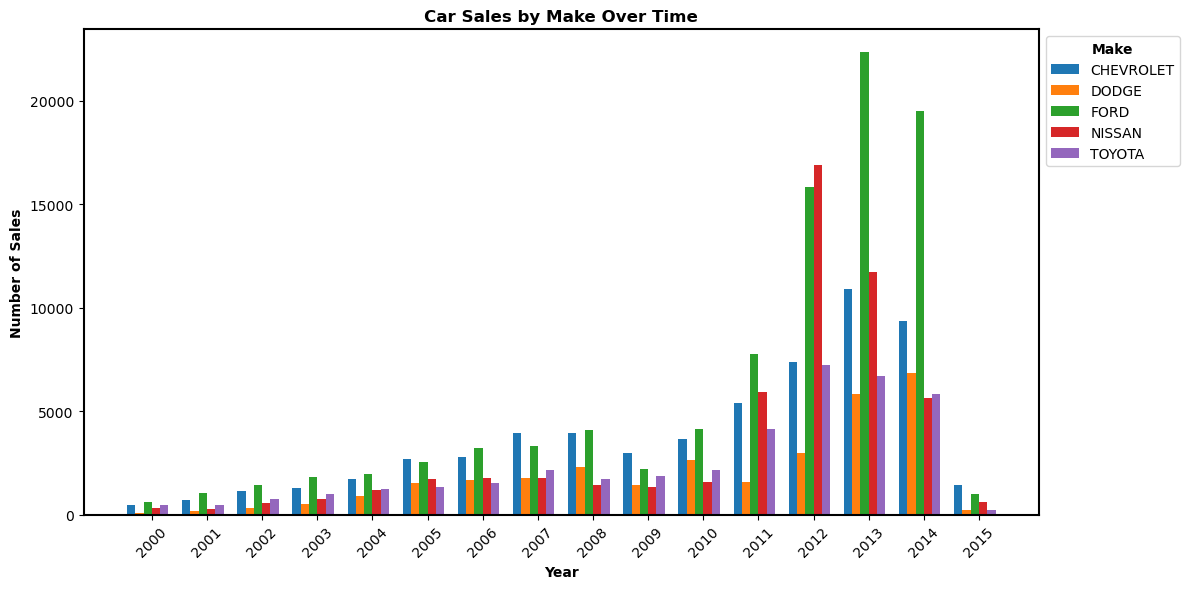

In [22]:
# convert make column to uppercase
df['make'] = df['make'].str.upper()

# select data from 2000 to 2014
df = df[(df['year'] >= 2000) & (df['year'] <= 2015)]

# combine makes split by vehicle type or different spelling
make_combo = {
    'VW': 'VOLKSWAGEN',
    'MERCEDES-B': 'MERCEDES',
    'MERCEDES-BENZ': 'MERCEDES',
    'FORD TK': 'FORD',
    'FORD TRUCK': 'FORD',
    'DODGE TK': 'DODGE',
    'CHEV TRUCK': 'CHEVROLET',
    'LANDROVER': 'LAND ROVER',
    'HYUNDAI TK': 'HYUNDAI',
    'MAZDA TK': 'MAZDA'
}
df['make'] = df['make'].replace(make_combo)

# convert 'year' column to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# group by 'make' and 'year', count number of sales
sales_make_year = df.groupby(['make', 'year']).size().reset_index(name='sales_count')

# get top 5 makes by total sales
top_makes = sales_make_year.groupby('make')['sales_count'].sum().nlargest(5).index
sales_make_year_top5 = sales_make_year[sales_make_year['make'].isin(top_makes)]

# pivot the dataframe so makes are column values
sales_final = sales_make_year_top5.pivot(index='year', columns='make', values='sales_count').fillna(0)

# plot grouped bar chart
plt.figure(figsize=(12, 6))
width = 0.15
for i, make in enumerate(sales_final.columns):
    x = np.arange(len(sales_final.index))
    plt.bar(x + (i - len(sales_final.columns)/2) * width, sales_final[make], width=width, label=make)

# configure plot and axis titles
plt.title('Car Sales by Make Over Time', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Sales', fontweight='bold')
plt.xticks(np.arange(len(sales_final.index)), [year.year for year in sales_final.index], rotation=45)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# configure legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Make', title_fontproperties={'weight':'bold'})

plt.tight_layout()
plt.show()

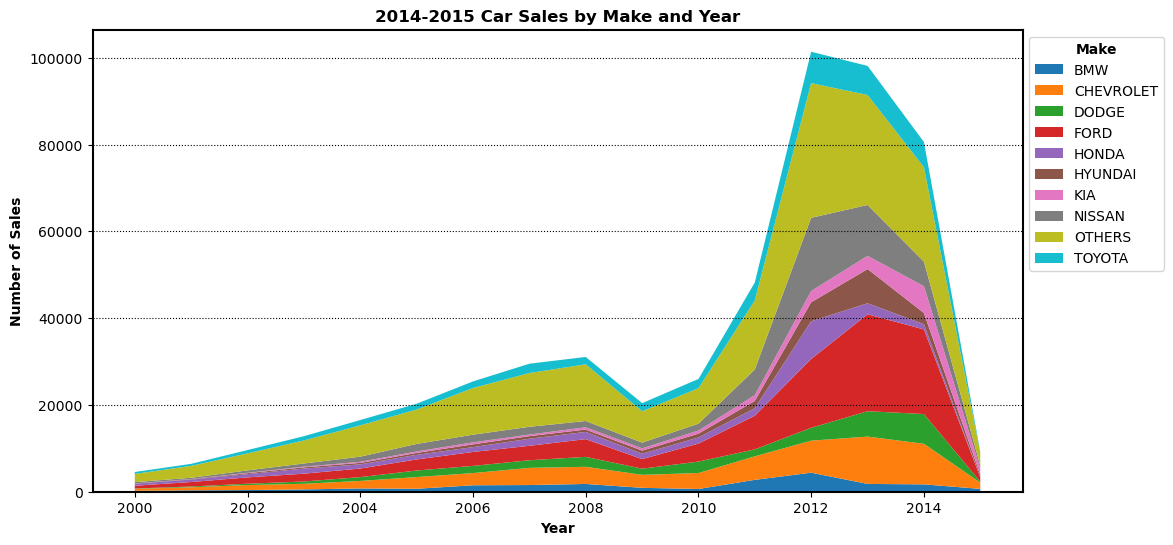

In [26]:
# convert make column to uppercase
df['make'] = df['make'].str.upper()

# select data from 2000 to 2014
df = df[(df['year'] >= 2000) & (df['year'] <= 2015)]

# combine makes split by vehicle type or different spelling
make_combo = {
    'VW': 'VOLKSWAGEN',
    'MERCEDES-B': 'MERCEDES',
    'MERCEDES-BENZ': 'MERCEDES',
    'FORD TK': 'FORD',
    'FORD TRUCK': 'FORD',
    'DODGE TK': 'DODGE',
    'CHEV TRUCK': 'CHEVROLET',
    'LANDROVER': 'LAND ROVER',
    'HYUNDAI TK': 'HYUNDAI',
    'MAZDA TK': 'MAZDA'
}
df['make'] = df['make'].replace(make_combo)

# convert 'year' column to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# group by 'make' and 'year', count number of sales
sales_make_year = df.groupby(['make', 'year']).size().reset_index(name='sales_count')

# get top 9 makes by total sales
top_makes = sales_make_year.groupby('make')['sales_count'].sum().nlargest(9).index
sales_make_year_top9 = sales_make_year[sales_make_year['make'].isin(top_makes)]

# create 'Others' dataframe from makes outside top 9
sales_make_year_others = sales_make_year[~sales_make_year['make'].isin(top_makes)]
sales_make_year_others = sales_make_year_others.groupby('year')['sales_count'].sum().reset_index()
sales_make_year_others['make'] = 'OTHERS'

# concatenate the top 9 and "Others" DataFrames
combined_df = pd.concat([sales_make_year_top9, sales_make_year_others], ignore_index=True)

# pivot the combined dataframe so makes are column values
sales_final = combined_df.pivot(index='year', columns='make', values='sales_count').fillna(0)

# create stacked areas for each make
plt.figure(figsize=(12, 6))
plt.stackplot(sales_final.index, [sales_final[make] for make in sales_final.columns], labels=sales_final.columns)

# configure plot and axis titles
plt.title('2014-2015 Car Sales by Make and Year', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Sales', fontweight='bold')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.grid(axis='y', color='black', linestyle='dotted')

# configure legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Make', title_fontproperties={'weight':'bold'})

plt.show()

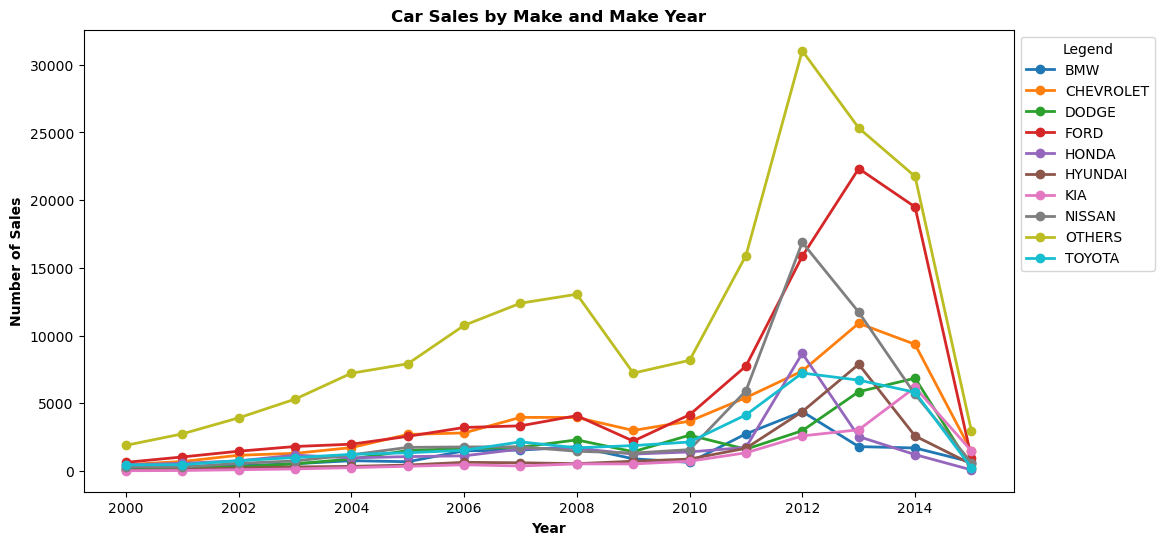

In [18]:
# convert 'make' column to uppercase
df['make'] = df['make'].str.upper()

# filter data from 2000 to 2015
df = df[(df['year'] >= 2000) & (df['year'] <= 2015)]

# combine makes split by vehicle type or different spelling
make_combo = {
    'VW': 'VOLKSWAGEN',
    'MERCEDES-B': 'MERCEDES',
    'MERCEDES-BENZ': 'MERCEDES',
    'FORD TK': 'FORD',
    'FORD TRUCK': 'FORD',
    'DODGE TK': 'DODGE',
    'CHEV TRUCK': 'CHEVROLET',
    'LANDROVER': 'LAND ROVER',
    'HYUNDAI TK': 'HYUNDAI',
    'MAZDA TK': 'MAZDA'
}

df['make'] = df['make'].replace(make_combo)

# convert 'year' column to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# group by 'make' and 'year', count number of sales
sales_make_year = df.groupby(['make', 'year']).size().reset_index(name='sales_count')

# get top 9 makes by total sales
top_makes = sales_make_year.groupby('make')['sales_count'].sum().nlargest(9).index
sales_make_year_top9 = sales_make_year[sales_make_year['make'].isin(top_makes)]

# create 'Others' dataframe from makes outside top 9
sales_make_year_others = sales_make_year[~sales_make_year['make'].isin(top_makes)]
sales_make_year_others = sales_make_year_others.groupby('year')['sales_count'].sum().reset_index()
sales_make_year_others['make'] = 'OTHERS'

# Concatenate the top 10 and "Others" DataFrames
combined_df = pd.concat([sales_make_year_top9, sales_make_year_others], ignore_index=True)

# pivot the combined dataframe so makes are column values
sales_final = combined_df.pivot(index='year', columns='make', values='sales_count').fillna(0)

# plot the data points
plt.figure(figsize=(12, 6))
for make in sales_final.columns:
    plt.plot(sales_final.index, sales_final[make], label=make, marker='o', linestyle='-', linewidth=2)

# configure plot and axis titles
plt.title('Car Sales by Make and Make Year', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Sales', fontweight='bold')

# configure legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Legend')

plt.show()